In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data-fully-cleaned.csv')
data.shape

(10675, 48)

# Charges

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import pyLDAvis
from pyLDAvis import lda_model

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [5]:
# import nltk
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [6]:
charge_data = data['Non-Dropped Charges']
charge_data = charge_data.fillna('None')
charge_data = charge_data.str.replace(r'[^a-zA-Z\s]', '', regex=True)
charge_data

0                                     Second Degree Murder
1                                  ARS First degree murder
2                                     Second Degree Murder
3        assault with intent to murder individuals on e...
4         Conspiracy to build a pipe bomb and travel in...
                               ...                        
10670    ORC  Unlawfully impeding the passage of an eme...
10671    ORC  Unlawfully impeding the passage of an eme...
10672    ORC  Unlawfully impeding the passage of an eme...
10673    ORC  Unlawfully impeding the passage of an eme...
10674    bF Use attempted use and threatened use of a d...
Name: Non-Dropped Charges, Length: 10675, dtype: object

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [8]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens) 


def lemmatize_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags
    ]
    return ' '.join(lemmatized_tokens)

In [9]:
charge_data = charge_data.apply(remove_stopwords)
charge_data = charge_data.apply(lemmatize_text)
charge_data

0                                     Second Degree Murder
1                                  ARS First degree murder
2                                     Second Degree Murder
3        assault intent murder individual embassy groun...
4        Conspiracy build pipe bomb travel interstate c...
                               ...                        
10670    ORC Unlawfully impede passage emergency respon...
10671    ORC Unlawfully impede passage emergency respon...
10672    ORC Unlawfully impede passage emergency respon...
10673    ORC Unlawfully impede passage emergency respon...
10674    bF Use attempt use threaten use dangerous weap...
Name: Non-Dropped Charges, Length: 10675, dtype: object

In [10]:
vec = CountVectorizer(ngram_range=(2, 2))

In [11]:
vec.fit(charge_data)

CountVectorizer(ngram_range=(2, 2))

In [12]:
td_matrix = vec.transform(charge_data)
td_matrix

<10675x12681 sparse matrix of type '<class 'numpy.int64'>'
	with 121083 stored elements in Compressed Sparse Row format>

In [13]:
dense = pd.DataFrame(td_matrix.todense(), columns=vec.get_feature_names_out())
dense.head()

,aa ab,aa aggravated,aa assault,aa attempted,aa attempting,aa cc,aa commission,aa conspiracy,aa count,aa cyberstalking,...,wweap attempted,xanax distribution,xlvi section,year age,yemen aiding,yemen december,york february,york penal,zone unauthorized,zone violation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


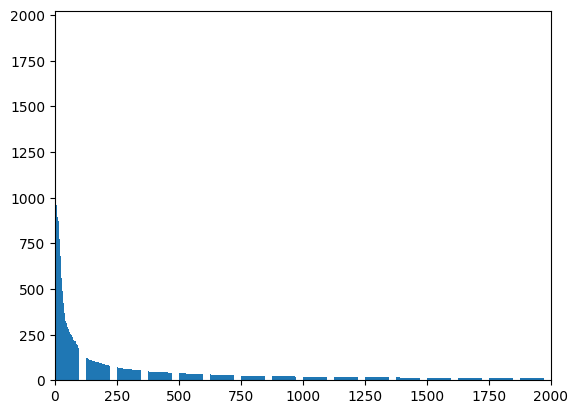

In [14]:
_ = plt.bar(range(0, dense.shape[1]), dense.sum().sort_values(ascending = False)) # Zipf's law
_ = plt.xlim(0, 2000) 

In [15]:
# for 2 grams
excluded_words = ['united states', 'building grounds', 'provide material', 'disruptive conduct', 'disorderly disruptive', 'dc code', 'remaining restricted',
                  'conduct capitol', 'eg parading', 'ed disorderly', 'conduct restricted', 'entering remaining', 'picketing capitol', 'parading demonstrating', 'conspiracy provide']

filtered_top_10 = (
    dense.sum()
    .drop(labels=excluded_words, errors='ignore')  # Drop excluded words
    .sort_values(ascending=False)[:10]  # Recompute top 10
)
filtered_top_10

restricted building        1928
capitol building           1713
material support           1701
disorderly conduct          934
terrorist organization      931
aiding abetting             889
foreign terrorist           871
conspiracy commit           773
demonstrating picketing     746
hate crime                  648
dtype: int64

In [16]:
vec = CountVectorizer() # uni-grams

In [17]:
vec.fit(charge_data)

CountVectorizer()

In [18]:
td_matrix = vec.transform(charge_data)
td_matrix

<10675x2731 sparse matrix of type '<class 'numpy.int64'>'
	with 112046 stored elements in Compressed Sparse Row format>

In [19]:
dense = pd.DataFrame(td_matrix.todense(), columns=vec.get_feature_names_out())
dense.head()

,aa,aaa,aaac,aab,aac,aad,aaf,aai,aaiding,aaii,...,writings,written,wsearch,wweap,xanax,xlvi,year,yemen,york,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


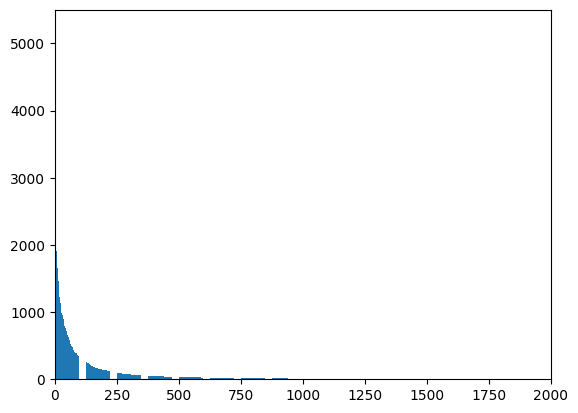

In [20]:
_ = plt.bar(range(0, dense.shape[1]), dense.sum().sort_values(ascending = False)) # Zipf's law
_ = plt.xlim(0, 2000) 

In [21]:
# for uni-grams
excluded_words = ['count']

filtered_top_10 = (
    dense.sum()
    .drop(labels=excluded_words, errors='ignore')  # Drop excluded words
    .sort_values(ascending=False)[:10]  # Recompute top 10
)
filtered_top_10

conspiracy    5240
building      4359
grounds       2275
capitol       2182
restricted    1941
conduct       1937
disorderly    1912
material      1878
possession    1824
support       1767
dtype: int64

In [22]:
top_10 = filtered_top_10.index.to_list()

In [23]:
def find_first_word(sentence, word_list):
    if not isinstance(sentence, str):
        return None
    for word in word_list:
        if word in sentence:
            return word
    return None  # Return None if no match is found

In [24]:
filtered_data = data[['Non-Dropped Charges', 'Length of prison sentence (years)', 'Age']].copy()
filtered_data['Non-Dropped Charges'] = filtered_data['Non-Dropped Charges'].dropna()
filtered_data['Found Word'] = data['Non-Dropped Charges'].apply(lambda x: find_first_word(x, top_10))
filtered_data = filtered_data[filtered_data['Found Word'].notna()]

filtered_data['Found Word'].value_counts()

Found Word
conspiracy    936
material      543
possession    379
building      338
conduct        58
support        30
restricted     20
grounds         8
capitol         6
Name: count, dtype: int64

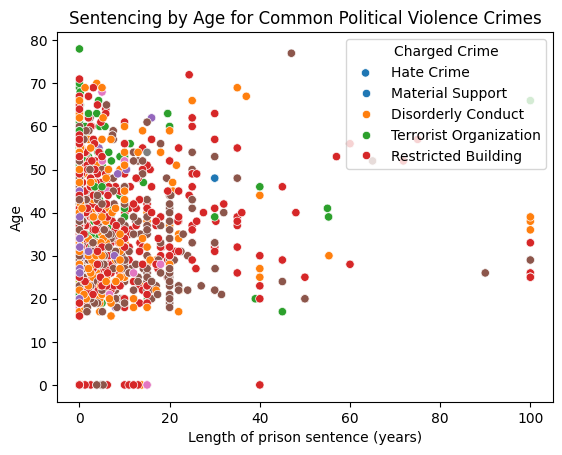

In [25]:
_ = sns.scatterplot(data=filtered_data, x=filtered_data['Length of prison sentence (years)'], y=filtered_data['Age'], hue=filtered_data['Found Word'])
_ = plt.legend(title='Charged Crime', labels=['Hate Crime', 'Material Support', 'Disorderly Conduct', 'Terrorist Organization', 'Restricted Building'])
_ = plt.title('Sentencing by Age for Common Political Violence Crimes')

In [26]:
lda = LDA(n_components=5, random_state=11) # number of topics

In [27]:
lda_out = lda.fit_transform(td_matrix)

In [28]:
viz = lda_model.prepare(lda, td_matrix, vec)
print('')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlo

In [29]:
pyLDAvis.save_html(viz, 'lda_charges_bigrams.html')

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import make_scorer

In [31]:
scorer = make_scorer(root_mean_squared_error)

In [32]:
X = dense
y = data['Length of prison sentence (years)']
y = y.fillna(0)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=11)
X_train.shape, X_test.shape

((8540, 2731), (2135, 2731))

In [59]:
clf = DecisionTreeRegressor(random_state=3) # Non-hyperparameter model

In [60]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=3)

In [61]:
preds_training = clf.predict(X_train)
print('RMSE:', root_mean_squared_error(y_train, preds_training))

RMSE: 4.171263469476044


In [62]:
preds_test = clf.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test, preds_test))

RMSE: 7.068089444523671


In [63]:
clf.get_depth()

293

In [64]:
from sklearn.tree import plot_tree

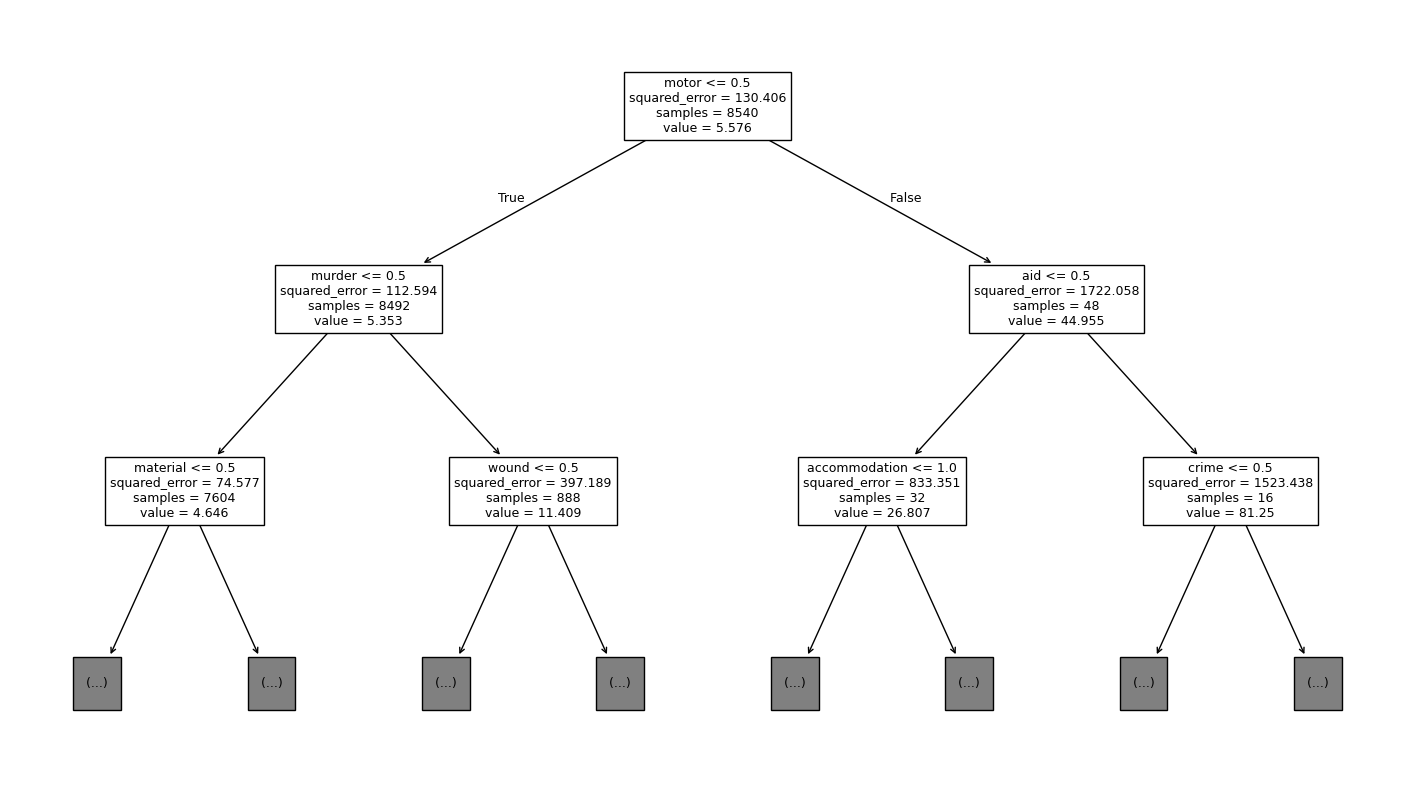

In [66]:
plt.figure(figsize=([18, 10]))
tree_plot = plot_tree(clf, max_depth = 2, feature_names=vec.get_feature_names_out())

In [41]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=11), 
                           param_grid={'max_depth' : [1,3,5,7,9,11,12]},
                           scoring=scorer, cv=5)


grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_ 

print("Depth:", best_depth)
print("Accuracy:", best_score)

Depth: 1
Accuracy: 11.125618013183294


In [42]:
clf = DecisionTreeRegressor(max_depth = 1)

In [43]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [44]:
preds_training = clf.predict(X_train)
print('RMSE:', root_mean_squared_error(y_train, preds_training))

RMSE: 11.029080234135606


In [45]:
preds_test = clf.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test, preds_test))

RMSE: 10.844878133678552


In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
clf_rf = RandomForestRegressor(random_state=11, n_jobs = -1)

In [48]:
clf_rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=11)

In [49]:
preds_train_rf = clf_rf.predict(X_train)

In [50]:
print('RMSE:', root_mean_squared_error(y_train, preds_train_rf))

RMSE: 4.528835084734859


In [51]:
preds_test_rf = clf_rf.predict(X_test)

In [52]:
print('RMSE:', root_mean_squared_error(y_test, preds_test_rf))

RMSE: 7.110607111053428


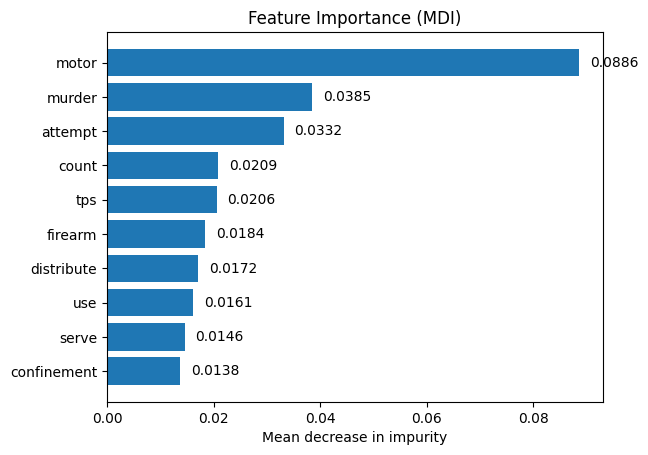

<Figure size 1000x900 with 0 Axes>

In [53]:
# obtain feature importance
feature_importance = clf_rf.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)[-10:] 
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(vec.get_feature_names_out())[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

# Add numerical values next to the bars
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 0.002, i, f'{v:.4f}', va='center')

plt.figure(figsize=(10, 9)) 
plt.show()

In [54]:
tree_depths = [tree.get_depth() for tree in clf_rf.estimators_]

In [55]:
print(max(tree_depths))

289


In [ ]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [72]:
grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid, n_jobs=-1, cv=3, verbose=10) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=59679) is multi-threaded, use of fork() may lead to deadlo

[CV 2/3; 1/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25
[CV 1/3; 2/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50
[CV 1/3; 1/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25
[CV 1/3; 3/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=100
[CV 3/3; 1/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25
[CV 3/3; 2/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50
[CV 2/3; 3/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=100
[CV 2/3; 2/108] START max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50
[CV 2/3; 1/108] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.055 total time=   0.7s
[CV 1/3; 1/108] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.057 total time=   0.8s
[CV 3/3; 1/108] END max_depth=3, max_features=sqrt, max_

In [75]:

clf_rf = RandomForestRegressor(max_depth=9, 
                                max_leaf_nodes=9, 
                                n_estimators=150) 
clf_rf.fit(X_train, y_train) 
y_pred_test = clf_rf.predict(X_test) 

In [77]:
preds_train_rf = clf_rf.predict(X_train)
print('RMSE Train:', root_mean_squared_error(y_train, preds_train_rf))
print('RMSE Test:', root_mean_squared_error(y_test, preds_test_rf))

RMSE Train: 9.811470631252305
RMSE Test: 6.983160659461511


In [78]:
tree_depths = [tree.get_depth() for tree in clf_rf.estimators_]
print(max(tree_depths))

8


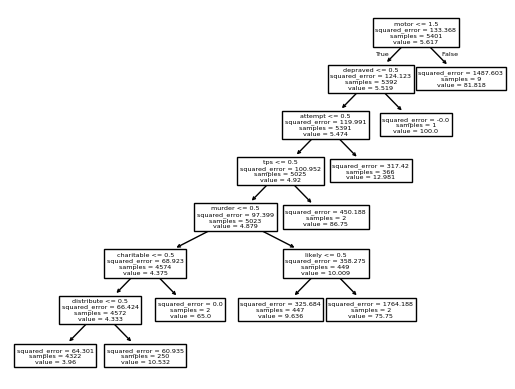

In [86]:
tree_plot = plot_tree(clf_rf.estimators_[0], feature_names=vec.get_feature_names_out())

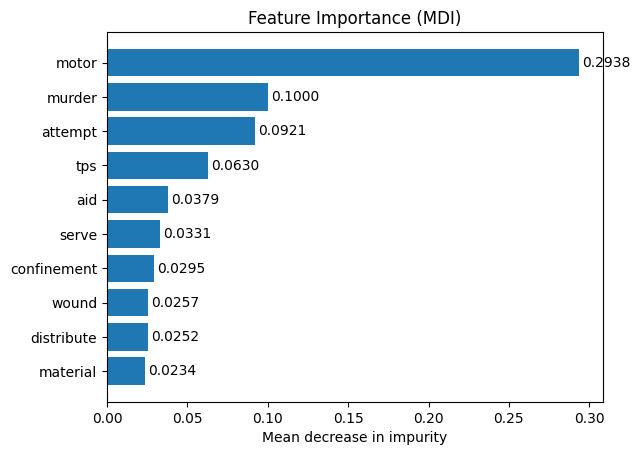

<Figure size 1000x900 with 0 Axes>

In [82]:
# obtain feature importance
feature_importance = clf_rf.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)[-10:] 
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(vec.get_feature_names_out())[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

# Add numerical values next to the bars
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 0.002, i, f'{v:.4f}', va='center')

plt.figure(figsize=(10, 9)) 
plt.show()